In [1]:
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt
from talib import abstract
import mplfinance as mpf
#import goo_doc_api as goo
#import yfinance as yf
#import pandas_datareader as web
import matplotlib
#matplotlib.use('ps')
from matplotlib import rc
#rc('text',usetex=True)
# rc('text.latex', preamble='\usepackage{color}')
import matplotlib.pyplot as plt

import datetime
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import io
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import math
import os


In [108]:
#from multiprocessing import Pool
cwd = os.getcwd()    
dir_path = os.path.join(os.path.abspath(os.path.join(cwd, os.pardir)), r"stock_market_data\nasdaq\csv"+'\\')
#stock_list = np.array([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
stock_list = np.array(os.listdir(dir_path))
stock_list = stock_list
tickers_train ,tickers_test = train_test_split(stock_list,test_size=0.2)  
#tickers=["AAPL"] # ,"CS"

# def read_csv(Stock_Name):
# 	df = pd.read_csv(dir_path+str(Stock_Name)+".csv", parse_dates=['Date'], dayfirst=True)
# 	df.set_index('Date', inplace=True)
# 	df=df[:'20240101']
# 	return df


# with Pool(processes=8) as pool: # or whatever your hardware can support

# 	# have your pool map the file names to dataframes
# 	df_list = pool.map(read_csv, tickers_train)

# 	# reduce the list of dataframes to a single dataframe
# 	df = pd.concat(df_list, ignore_index=True)

df_list = []
for i in ['AAPL.csv']:#tickers_train:

	# download stock price data
	Stock_Name= i
	symbol = i
	tickers = symbol
	#df = yf.download(symbol, period='6mo')
	#dir_path = r"C:\D\Ryan\TAMU_class\STAT654\Project\stock_market_data\nasdaq\csv"+'\\'
	#df = pd.read_csv(dir_path+str(Stock_Name)+".csv", parse_dates=['Date'], dayfirst=True)
	df = pd.read_csv(dir_path+str(Stock_Name), parse_dates=['Date'], dayfirst=True)
	
	#df= pd.read_csv(dir_path+str(Stock_Name)+".csv")  # C:\D\Ryan\TAMU_class\STAT654\Project\stock_market_data\nasdaq\csv
	# current_price = web.get_quote_yahoo(tickers)["regularMarketPrice"]
	# print(current_price)
	df.set_index('Date', inplace=True)
	df=df[:'20240101']  # '20100101'
	df_list.append(df)

#df = pd.concat(df_list, ignore_index=True)
	#df.reset_index(inplace=True)
	# Add MACD as subplot


	#macd = MACD(df, 12, 26, 9)
	#stochastic = Stochastic(df, 14, 3)

In [3]:
df

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492
...,...,...,...,...,...,...
2022-12-06,141.919998,147.070007,64727200,147.300003,142.910004,142.910004
2022-12-07,140.000000,142.190002,69721100,143.369995,140.940002,140.940002
2022-12-08,141.100006,142.360001,62128300,143.520004,142.649994,142.649994


In [109]:
def sliding_window_iter_array(array, window_size, step_size):
	"""series is a column of a dataframe"""
	for start_row in range((array.shape[0] -window_size )//step_size  +1):  ## cannot plus 2
		raw_data=array[start_row* step_size   :   start_row* step_size      + window_size, :]
		yield (raw_data[:,0]-raw_data[:,0].min(axis = 0))/(raw_data[:,0].max(axis = 0)-raw_data[:,0].min(axis = 0)), raw_data[:,1]
		#yield (raw_data-raw_data.min(axis = 0))/(raw_data.max(axis = 0)-raw_data.min(axis = 0))
		#yield raw_data
# 'C': [0, 1, 2, None, 4]},
# df = pd.DataFrame({'A': list(range(100, 501, 100)),
#                    'B': list(range(-20, -15)),},
				   
#                   index=pd.date_range('2021-01-01', periods=))

df = df_list[0]
df['Volume'][df['Volume']==0] = 0.0000001
df['Volume_ratio'] = df['Volume'].div(df['Volume'].shift(1))
#print(df['Volume_diff'][df['Volume_diff']>0])
df['Volume_ratio'] = np.log10(df['Volume_ratio'])
df.dropna(inplace=True)
df.reset_index(drop=True)
# 238 rows × 6 columns
#slice_array=np.array(list(sliding_window_iter_array(df[['Adjusted Close']].to_numpy(), 120,5))) ## remove timestamp
#slice_array=np.array(list(sliding_window_iter_array(df[['Volume_ratio']].to_numpy(), 120,5))) ## remove timestamp
slice_array=np.array(list(sliding_window_iter_array(df[['Adjusted Close', 'Volume_ratio']].to_numpy(), 120,5))) ## remove timestamp
slice_array = np.transpose(slice_array, (0, 2, 1))
#timeless_slice_data=[x.reset_index(drop=True) for x in slice_data]
print(slice_array)
print(slice_array.shape)  ## check the length of the last window
#np.save('AAPL_slice.npy', slice_array)
#timeless_slice_data
## concat list to dataframe  to mulitpe columns and drop index 

#df_window=pd.concat(timeless_slice_data, axis=1)
# df_rolling = df_list[0].rolling(120, min_periods=120, step=5)
# print(type(df_rolling))
# print([len(window) for window in df_rolling])


[[[ 0.39131092 -0.42597565]
  [ 0.25217414 -0.22103829]
  [ 0.29564983 -0.08746722]
  ...
  [ 0.68696135 -0.01071785]
  [ 0.73043689  0.15270149]
  [ 0.69565703  0.01231638]]

 [[ 0.55651816 -0.11446378]
  [ 0.64348536  0.09919523]
  [ 0.75652228  0.00963089]
  ...
  [ 0.68696135 -0.67592153]
  [ 0.78260677  0.18901086]
  [ 0.75652228 -0.17909677]]

 [[ 1.         -0.1311438 ]
  [ 0.92593088 -0.28481223]
  [ 0.95370684 -0.21760641]
  ...
  [ 0.71296512 -0.1306342 ]
  [ 0.70370636 -0.07784268]
  [ 0.63889664  0.07678299]]

 ...

 [[ 0.47281118 -0.01148335]
  [ 0.34248078  0.08786099]
  [ 0.35947072 -0.0923848 ]
  ...
  [ 0.4721344   0.09753998]
  [ 0.48491552 -0.03112536]
  [ 0.41136706 -0.10525705]]

 [[ 0.28122793  0.10982299]
  [ 0.15805126  0.11931019]
  [ 0.0406864   0.1259702 ]
  ...
  [ 0.41360953 -0.21918691]
  [ 0.32638284  0.29390262]
  [ 0.25799166  0.08266168]]

 [[ 0.          0.07234401]
  [ 0.03353267  0.09486612]
  [ 0.1298832  -0.22030013]
  ...
  [ 0.40688247 -0.037067

In [123]:
# other option tslearn https://tslearn.readthedocs.io/en/stable/user_guide/clustering.html
num_clusters =20
clusterer = KMeans(n_clusters=num_clusters, random_state=1)
#model=clusterer.fit(slice_data)
# slice_array=slice_array.reshape(slice_array.shape[0], -1)
# model=clusterer.fit(slice_array)
model=clusterer.fit(slice_array[:,:,0])


print (model.labels_ , len(model.labels_ ))
# cluster_labels = clusterer.fit_predict(slice_data)

# # Plot the clustered time series
# plt.figure(figsize=(12, 6))
# for i in range(num_clusters):
#     plt.plot(np.mean(slice_data[cluster_labels == i], axis=0), label=f'Cluster {i+1}')
# plt.legend()
# plt.title('Clustered Time Series')
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.show()

c:\Users\littl\Documents\PhD\2023 Fall\SFU\satellite_code\stat654\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[18 18 14 ... 13 13  4] 2094


In [124]:
## create color list of number 20 from sns 
import seaborn as sns
colors = sns.color_palette("hls", num_clusters)
print(colors)

#labels=np.array(model.labels_).reshape(-1)
labels=np.array(model.predict(slice_array[:,:,0])).reshape(-1)
labels


[(0.86, 0.3712, 0.33999999999999997), (0.86, 0.5272, 0.33999999999999997), (0.86, 0.6832, 0.33999999999999997), (0.86, 0.8392000000000002, 0.33999999999999997), (0.7247999999999999, 0.86, 0.33999999999999997), (0.5688000000000001, 0.86, 0.33999999999999997), (0.41279999999999994, 0.86, 0.33999999999999997), (0.33999999999999997, 0.86, 0.42320000000000013), (0.33999999999999997, 0.86, 0.5792000000000002), (0.33999999999999997, 0.86, 0.7352000000000001), (0.33999999999999997, 0.8287999999999999, 0.86), (0.33999999999999997, 0.6727999999999997, 0.86), (0.33999999999999997, 0.5167999999999995, 0.86), (0.33999999999999997, 0.36079999999999973, 0.86), (0.4752000000000003, 0.33999999999999997, 0.86), (0.6311999999999998, 0.33999999999999997, 0.86), (0.7871999999999999, 0.33999999999999997, 0.86), (0.86, 0.33999999999999997, 0.7767999999999993), (0.86, 0.33999999999999997, 0.6207999999999999), (0.86, 0.33999999999999997, 0.46479999999999977)]


array([18, 18, 14, ..., 13, 13,  4])

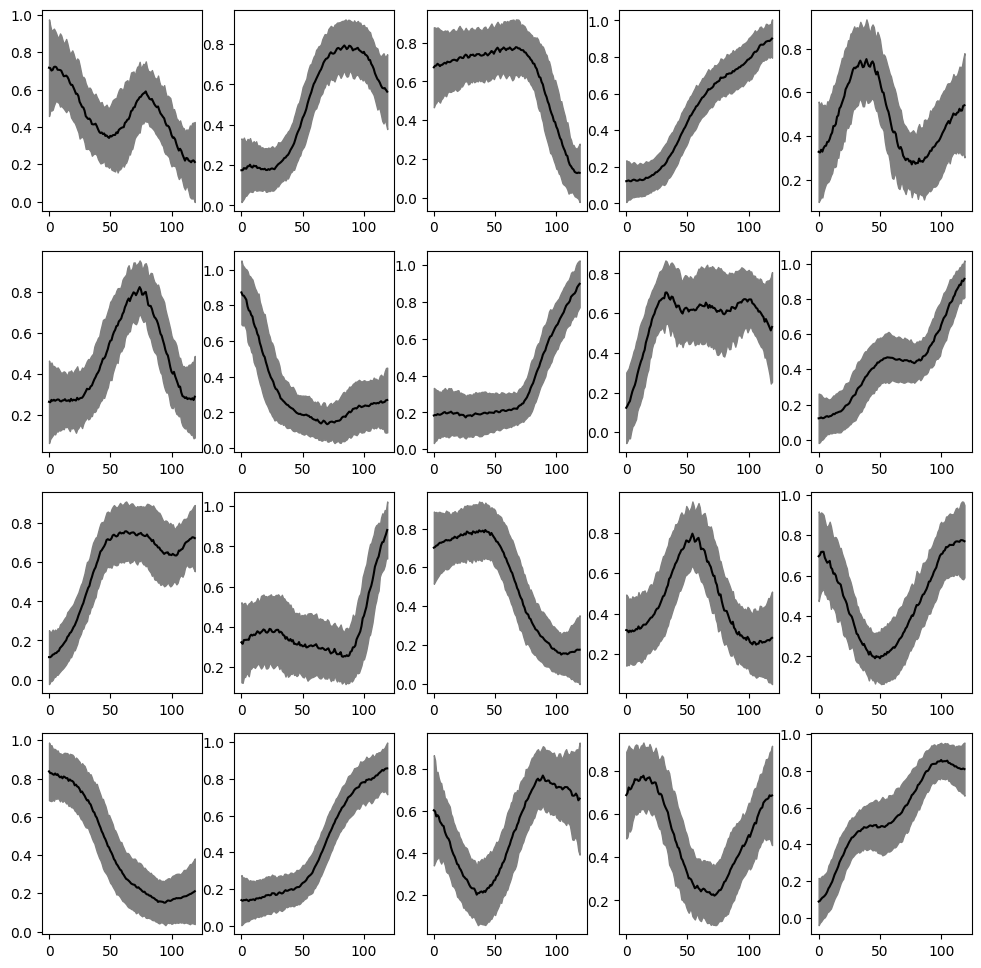

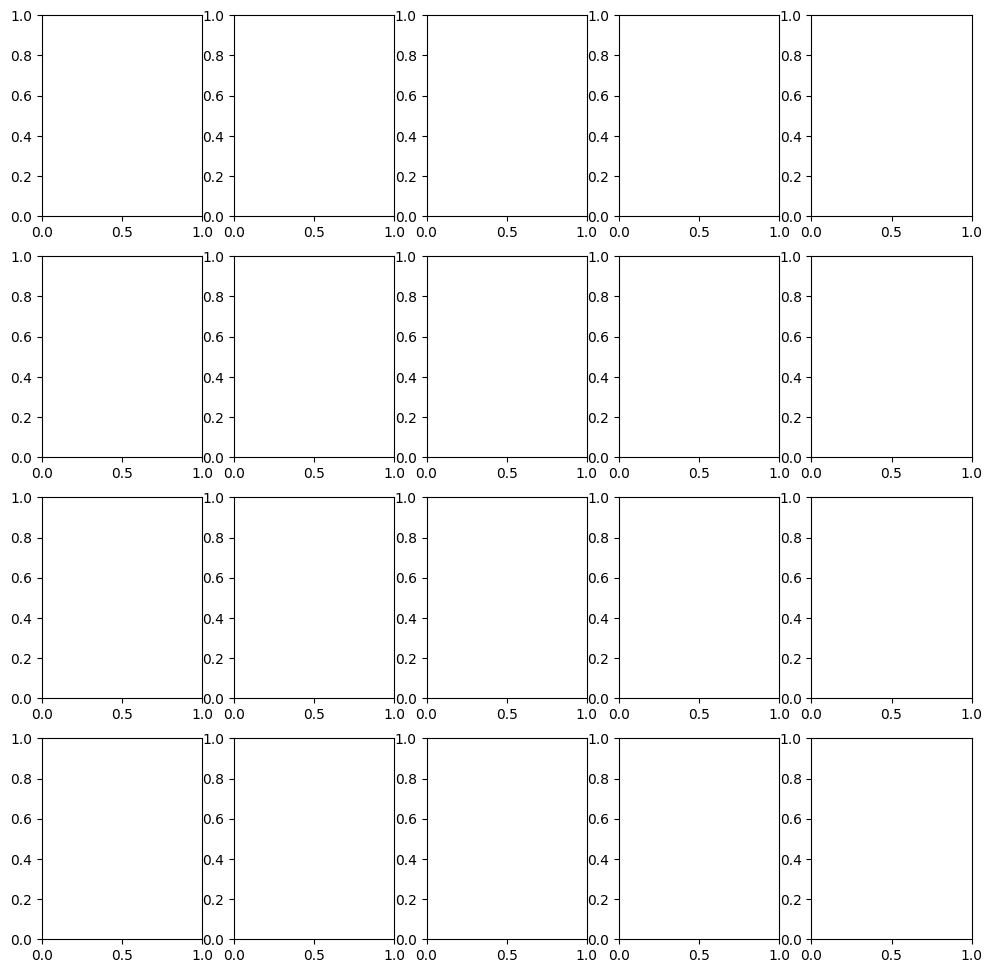

In [125]:
dim_H = int(math.sqrt(num_clusters))
dim_W = math.ceil(num_clusters/int(math.sqrt(num_clusters)))
fig_price, axes_price = plt.subplots(dim_H, dim_W, figsize=(12, 12))
axs_price = axes_price.flatten()
fig_vol, axes_vol = plt.subplots(dim_H, dim_W, figsize=(12, 12))
axs_vol = axes_vol.flatten()

for j in range(num_clusters): # range(num_clusters):
	slice_array_label = np.take(slice_array, np.where(labels==j)[0].astype(int), 0)
	column_mean = slice_array_label.mean(axis=0)
	column_std = slice_array_label.std(axis=0)
	axs_price[j].plot(range(0,120),column_mean[:, 0],color='black')
	axs_price[j].fill_between(range(0,120), column_mean[:, 0]-column_std[:, 0], column_mean[:, 0]+column_std[:, 0],color='grey')
	#axs_vol[j].plot(range(0,120),column_mean[:, 1],color='black')
	#axs_vol[j].fill_between(range(0,120), column_mean[:, 1]-column_std[:, 1], column_mean[:, 1]+column_std[:, 1],color='grey')

plt.show()

# for j in range(num_clusters): # range(num_clusters):
# 	df_window_label = df_window.iloc[:, np.where(labels==j)[0].astype(int)]
# 	column_mean = df_window_label.mean(axis=1)
# 	column_std = df_window_label.std(axis=1)
# 	axs[j].plot(range(0,120),column_mean,color='black') # label=f'Cluster {i+1}'
# 	axs[j].plot(range(0,120),column_mean-column_std,color='grey') # label=f'Cluster {i+1}'
# 	axs[j].plot(range(0,120),column_mean+column_std,color='grey') # label=f'Cluster {i+1}'
# 	axs[j].fill_between(range(0,120), column_mean-column_std, column_mean+column_std,color='grey')

# plt.show()

	# for i in np.where(labels==j)[0]: 
	#     #for i in group_array:
	# #group_array
	#     #print(i)


	#     #plt.plot(range(0,120),slice_data[i] ,color=colors[j]) # label=f'Cluster {i+1}'
	#     plt.plot(range(0,120),slice_data[i].mean() ,color='black') # label=f'Cluster {i+1}'
	# plt.show()